In [1]:
import matplotlib.pyplot as plt
from IPython import display

from dataset_creation import create_dataset
from utils import get_yamnet_classes, get_taxonomy_leaves

2023-11-23 11:00:05.022119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 11:00:05.553385: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-23 11:00:05.553424: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-23 11:00:07.482964: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
complete_dataset = create_dataset(return_empty_lab_elements=True)
len(complete_dataset)

239

In [3]:
dataset = create_dataset(return_empty_lab_elements=False)
len(dataset)

216

In [4]:
yamnet_names = get_yamnet_classes()
len(yamnet_names)

521

In [5]:
unique_labels = get_taxonomy_leaves()
len(unique_labels)

30

Let's try the code with one element of the dataset

In [6]:
index = 10

In [7]:
audio_data, yamnet_output = dataset[index].get_data(), dataset[index].get_yamnet_output()
labels = dataset[index].labels
# yamnet output usually is probabilities, embedding, spectrogram
# labels is dictionary {frame_number: list of labels}
audio_data.shape, len(yamnet_output), yamnet_output[0].shape, yamnet_output[1].shape#, yamnet_output[2].shape we don't save spectrograms

2023-11-23 11:02:08.245108: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


(TensorShape([505266]), 2, TensorShape([11, 521]), TensorShape([11, 1024]))

In [8]:
unique_file_labels = []
for el in labels.values():
    unique_file_labels.extend(el)
unique_file_labels = set(unique_file_labels)
unique_file_labels

{'Nature/Animals/Bird'}

In [9]:
for frame in sorted(list(labels.keys())):
    print(f'Frame {frame}, label {labels[frame]}')

Frame 18, label ['Nature/Animals/Bird']
Frame 19, label ['Nature/Animals/Bird']
Frame 20, label ['Nature/Animals/Bird']
Frame 21, label ['Nature/Animals/Bird']
Frame 22, label ['Nature/Animals/Bird']
Frame 46, label ['Nature/Animals/Bird']
Frame 47, label ['Nature/Animals/Bird']
Frame 48, label ['Nature/Animals/Bird']
Frame 49, label ['Nature/Animals/Bird']
Frame 50, label ['Nature/Animals/Bird']
Frame 51, label ['Nature/Animals/Bird']


In [10]:
for i, el in enumerate(dataset[index].get_yamnet_prediction()):
    el = el.numpy()
    name = yamnet_names[el.argmax()]
    prob = el.max()
    print(f'Frame {i}, {name} : {prob}')

Frame 0, Bird : 0.9586969614028931
Frame 1, Bird vocalization, bird call, bird song : 0.9065970182418823
Frame 2, Animal : 0.9856566190719604
Frame 3, Animal : 0.7312214374542236
Frame 4, Bird : 0.9090359807014465
Frame 5, Animal : 0.949073076248169
Frame 6, Bird : 0.6848214268684387
Frame 7, Animal : 0.8631612658500671
Frame 8, Bird : 0.9678398966789246
Frame 9, Bird : 0.9505115747451782
Frame 10, Wild animals : 0.9854063987731934


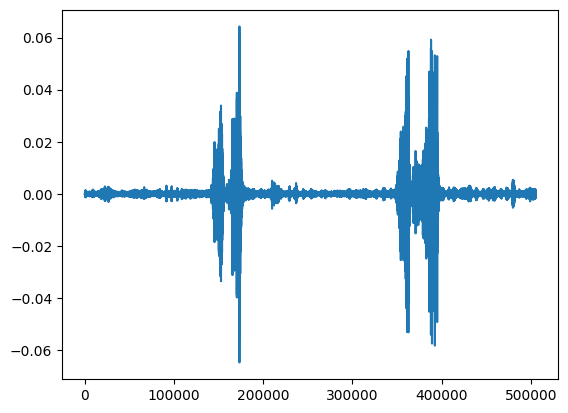

In [12]:
_ = plt.plot(audio_data)

# Play the audio file.
display.Audio(audio_data, rate=16000)